In [2]:
# Tensorflow and Keras
from tensorflow import keras
import tensorflow as tf
import pandas as pd
#Numpy and MPL
import numpy as np
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [3]:
(X_train_full, Y_train_full), (X_test, Y_test) = keras.datasets.mnist.load_data()

print(X_train_full.shape)
print(Y_train_full.shape)

X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
Y_valid, Y_train = Y_train_full[:5000], Y_train_full[5000:]

X_test = X_test/255.0

(60000, 28, 28)
(60000,)


In [12]:
checkpoint = keras.callbacks.ModelCheckpoint("dense_model.h5", save_best_only=True)
early_stopping = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

model = keras.Sequential([
  keras.layers.Flatten(input_shape=[28, 28]),
  keras.layers.BatchNormalization(),
  keras.layers.Dense(75, activation='elu', kernel_initializer="he_normal"),
    
  keras.layers.Dense(50, activation='relu'),
  keras.layers.BatchNormalization(),
  keras.layers.Dropout(0.1),
    
  keras.layers.Dense(25, activation='relu'),
  keras.layers.BatchNormalization(),
  keras.layers.Dropout(0.1),

  keras.layers.Dense(10, activation='softmax')
])


model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=1e-2, decay=1e-3),
              metrics=["accuracy"])

history = model.fit(X_train, 
                    Y_train, 
                    epochs=10, 
                    validation_data=(X_valid, Y_valid),
                    callbacks=[checkpoint, early_stopping])

Epoch 1/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3012 - accuracy: 0.9107 - val_loss: 0.1256 - val_accuracy: 0.9630
Epoch 2/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.1529 - accuracy: 0.9546 - val_loss: 0.1099 - val_accuracy: 0.9710
Epoch 3/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.1203 - accuracy: 0.9642 - val_loss: 0.0920 - val_accuracy: 0.9742
Epoch 4/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0966 - accuracy: 0.9704 - val_loss: 0.0860 - val_accuracy: 0.9752
Epoch 5/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0850 - accuracy: 0.9739 - val_loss: 0.0875 - val_accuracy: 0.9760
Epoch 6/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0744 - accuracy: 0.9769 - val_loss: 0.0890 - val_accuracy: 0.9744
Epoch 7/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0701 - accuracy: 0.9783 - val_loss: 0.0808 - val_ac

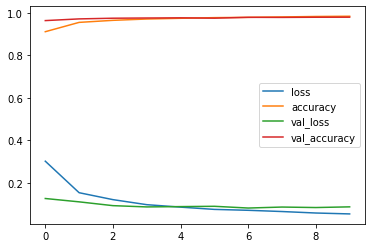

313/313 [==============================] - 1s 2ms/step - loss: 0.0916 - accuracy: 0.9779


[0.09159749001264572, 0.9779000282287598]

In [13]:
pd.DataFrame(history.history).plot()
plt.show()

model.evaluate(X_test, Y_test)